In [1]:
!pip install librosa

In [2]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 49.2 MB/s eta 0:00:00


In [3]:
import librosa
librosa.__version__

'0.11.0'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io import BytesIO
import yt_dlp
import os
from pathlib import Path

In [10]:
get_ipython().system('pip install --upgrade yt-dlp')

In [140]:
import yt_dlp
import os
from pathlib import Path
import librosa

# Replace this with the YouTube URL of the video you want to download
URL = "https://www.youtube.com/watch?v=dQw4w9WgXcQ" # Example URL, replace with another video like :
                                                    #URL = "https://youtu.be/ziABaAUq5Ck?si=00NbjeNrNqS6WR9N"
                                                    #URL = "https://youtu.be/A3TKxux17ZA?si=mhCm4yTh-TMGGpbM"
                                                    #URL = "https://youtu.be/ZbZSe6N_BXs?si=X-bV03p_pI5Pj-s3"

Workdir = Path()

# Define a base name for the audio file, without the extension
temp_base_name = "temp_youtube_audio"
output_ext = "mp3"  # The desired output extension

# Path for yt-dlp to use as a template (it will append the extension)
ydldp_outtmpl_path = Workdir / temp_base_name

# The full expected path to the file that librosa will actually load
final_audio_path = Workdir / f"{temp_base_name}.{output_ext}"

ydl_opts = {
    'format': 'bestaudio/best',  # Select the best audio format
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': output_ext,  # Use the desired extension
        'preferredquality': '192',
    }],
    'outtmpl': str(ydldp_outtmpl_path),  # yt-dlp will append the extension (e.g., .mp3)
    'noplaylist': True,  # Only download the single video
    'quiet': True,       # Suppress console output from yt-dlp
    'no_warnings': True  # Suppress warnings
}

try:
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([URL])

    # Load the downloaded audio file with librosa
    y, sr = librosa.load(final_audio_path, sr=22050)

    print(f"Audio loaded successfully. Sample rate: {sr}, duration: {len(y)/sr:.2f} seconds")

    # Clean up the temporary audio file
    os.remove(final_audio_path)
    print(f"Temporary audio file removed")
except Exception as e:
    print(f"An error occurred during download or processing: {e}")
    if '403 Forbidden' in str(e):
        print("This often indicates that YouTube is blocking the download for this video.\n" \
              "Consider trying a different URL or downloading the audio manually and uploading it to Colab.")

Audio loaded successfully. Sample rate: 22050, duration: 213.04 seconds
Temporary audio file removed


In [49]:
def extract_features(y,sr,Music_Information_Retrieval):

    frame_length = 2048
    hop_length = 512

    if Music_Information_Retrieval == 'Wave Form':

      librosa.display.waveshow(y=y, sr=sr, color="g")
      plt.title("Wave Form")

    elif Music_Information_Retrieval == 'RMS Energy':

      rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
      plt.plot(rms, c = "b")
      plt.title("RMS Energy")

    elif Music_Information_Retrieval == 'Spectrogram':

      S = librosa.stft(y)
      S_db = librosa.amplitude_to_db(abs(S), ref=np.max)
      librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
      plt.title("Spectrogram")
      rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, hop_length=hop_length)[0]
      plt.plot(librosa.times_like(rolloff), rolloff, color='g', label='Spectral Rolloff')
      plt.legend()

    elif Music_Information_Retrieval == 'Feature Evolution':

       plt.plot(librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0], c = "b", label="Energy")
       plt.plot(librosa.feature.spectral_centroid(y=y, sr=sr, hop_length=hop_length)[0], c = "r", label="Brightness")
       plt.plot(librosa.feature.zero_crossing_rate(y=y, hop_length=hop_length)[0], c = "g", label="Rhythm")
       plt.legend()
       plt.title("Feature Evolution")

    elif Music_Information_Retrieval == 'MFCC Heatmap':
       # For MFCC Heatmap, use specshow
       mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=hop_length)
       librosa.display.specshow(mfccs, x_axis='time', sr=sr)
       plt.colorbar()
       plt.title("MFCC Heatmap")

    elif Music_Information_Retrieval == 'Bandwidth':
      bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr, hop_length=hop_length)[0]
      plt.plot(bandwidth, c = "g" , label= "bandwidth")
      plt.title("Bandwidth")


    else:
      print(f"THE AVAILABLE OPTIONS ARE: | Wave Form | RMS Energy | Spectrogram | Feature Evolution | MFCC Heatmap | Bandwidth")

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


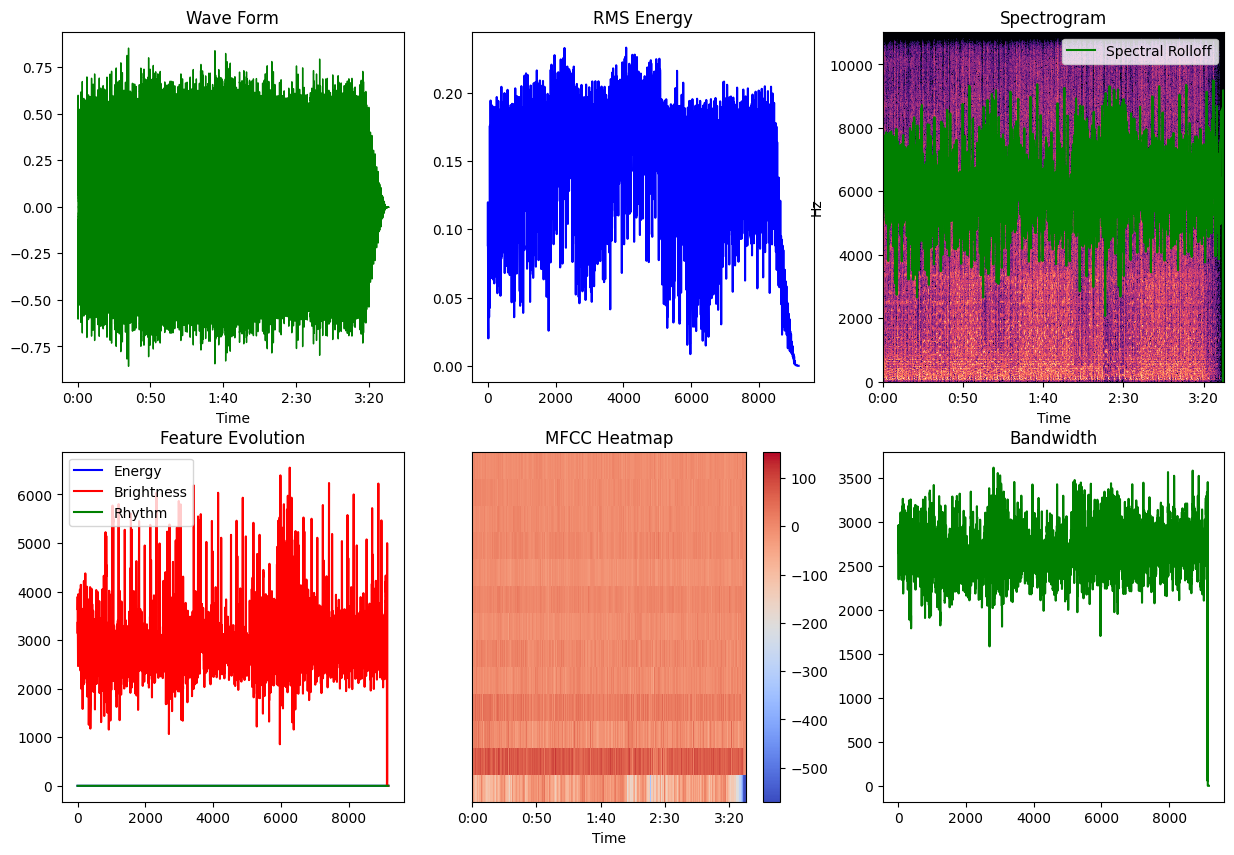

In [16]:
options = {"0":"Wave Form" , "1":"RMS Energy" , "2":"Spectrogram" , "3":"Feature Evolution" , "4":"MFCC Heatmap" , "5":"Bandwidth" }

plt.figure(figsize=(15,10))
for idx in range(6):
  plt.subplot(2,3,idx + 1)
  extract_features(y,sr,options[str(idx)])

In [46]:
print(f"the numbre of frames : {len(y)//2048}")


the numbre of frames : 968


In [47]:
dict_of_frames = {}
frame_length = 2048
hop_length = 512

for id_val in __builtins__.range(968):
  dict_of_frames[f"frame_{id_val}"] = y[:frame_length]
  y = y[hop_length:]

print(f"the size of the dictionary is {len(dict_of_frames)}")
print(f"the dictionary : {dict_of_frames}")

the size of the dictionary is 968
the dictionary : {'frame_0': array([-0.04017306, -0.00851545, -0.01045308, ...,  0.03958482,
       -0.00091317,  0.00106412], dtype=float32), 'frame_1': array([-0.01626363,  0.04055092,  0.06544085, ..., -0.02518006,
       -0.00417734,  0.00663525], dtype=float32), 'frame_2': array([-0.01344556, -0.00616113, -0.01793241, ...,  0.04901697,
        0.01414192,  0.00276489], dtype=float32), 'frame_3': array([ 0.18847583,  0.06533578, -0.02120805, ..., -0.03063166,
       -0.03036439, -0.04209523], dtype=float32), 'frame_4': array([ 0.00791181,  0.03653422, -0.00695266, ...,  0.08024064,
        0.3007688 ,  0.3591475 ], dtype=float32), 'frame_5': array([-0.02441992,  0.00932539,  0.0116034 , ..., -0.01121234,
        0.10274784, -0.09581102], dtype=float32), 'frame_6': array([ 0.00463361, -0.02607323, -0.03409021, ...,  0.3778503 ,
        0.4185328 ,  0.30832973], dtype=float32), 'frame_7': array([-0.04037863, -0.00650537, -0.00789475, ..., -0.04955331

In [92]:
dict_of_features = {}

def extract_features_02(y,sr):
    frame_length = 2048
    hop_length = 512

    features = {}

    rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
    features['rms_mean'] = np.mean(rms)
    features['rms_std'] = np.std(rms)

    zcr = librosa.feature.zero_crossing_rate(y=y, hop_length=hop_length)[0]
    features['zcr_mean'] = np.mean(zcr)
    features['zcr_std'] = np.std(zcr)

    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, hop_length=hop_length)[0]
    features['rolloff_mean'] = np.mean(rolloff)
    features['rolloff_std'] = np.std(rolloff)

    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr, hop_length=hop_length)[0]
    features['spectral_centroid_mean'] = np.mean(spectral_centroid)
    features['spectral_centroid_std'] = np.std(spectral_centroid)

    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr, hop_length=hop_length)[0]
    features['bandwidth_mean'] = np.mean(bandwidth)
    features['bandwidth_std'] = np.std(bandwidth)

    S = librosa.stft(y)
    S_db = librosa.amplitude_to_db(abs(S), ref=np.max)
    features['s_db_mean'] = np.mean(S_db)
    features['s_db_std'] = np.std(S_db)

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=hop_length)
    for i in __builtins__.range(mfccs.shape[0]):
        features[f'mfcc_{i}_mean'] = np.mean(mfccs[i])
        features[f'mfcc_{i}_std'] = np.std(mfccs[i])

    # Delta features (using width=3 as it caused issues before)
    delta_rms = librosa.feature.delta(rms, width=3)
    features['delta_rms_mean'] = np.mean(delta_rms)
    features['delta_rms_std'] = np.std(delta_rms)

    delta_zcr = librosa.feature.delta(zcr, width=3)
    features['delta_zcr_mean'] = np.mean(delta_zcr)
    features['delta_zcr_std'] = np.std(delta_zcr)

    delta_rolloff = librosa.feature.delta(rolloff, width=3)
    features['delta_rolloff_mean'] = np.mean(delta_rolloff)
    features['delta_rolloff_std'] = np.std(delta_rolloff)

    delta_spectral_centroid = librosa.feature.delta(spectral_centroid, width=3)
    features['delta_spectral_centroid_mean'] = np.mean(delta_spectral_centroid)
    features['delta_spectral_centroid_std'] = np.std(delta_spectral_centroid)

    delta_bandwidth = librosa.feature.delta(bandwidth, width=3)
    features['delta_bandwidth_mean'] = np.mean(delta_bandwidth)
    features['delta_bandwidth_std'] = np.std(delta_bandwidth)

    delta_mfccs = librosa.feature.delta(mfccs, width=3)
    for i in __builtins__.range(delta_mfccs.shape[0]):
        features[f'delta_mfcc_{i}_mean'] = np.mean(delta_mfccs[i])
        features[f'delta_mfcc_{i}_std'] = np.std(delta_mfccs[i])

    return features


for key , value in dict_of_frames.items():
  dict_of_features[key] = extract_features_02(value,sr)

df = pd.DataFrame(dict_of_features).T
df.head()

,rms_mean,rms_std,zcr_mean,zcr_std,rolloff_mean,rolloff_std,spectral_centroid_mean,spectral_centroid_std,bandwidth_mean,bandwidth_std,...,delta_mfcc_8_mean,delta_mfcc_8_std,delta_mfcc_9_mean,delta_mfcc_9_std,delta_mfcc_10_mean,delta_mfcc_10_std,delta_mfcc_11_mean,delta_mfcc_11_std,delta_mfcc_12_mean,delta_mfcc_12_std
frame_0,0.045213,0.007905,0.208691,0.059679,8096.484375,549.117790,4205.695042,423.046913,3144.723445,142.290665,...,3.320271,0.748829,0.576079,1.175149,1.909866,1.454557,4.282372,1.829387,-0.591638,2.391082
frame_1,0.044183,0.007521,0.188086,0.051802,7861.772461,486.116532,4032.987199,336.108822,3104.531745,135.563253,...,1.032661,2.194939,-1.002480,1.213588,-0.365841,0.648883,0.299503,3.325728,-1.127740,2.199039
frame_2,0.039552,0.010348,0.168262,0.044993,7377.275391,251.524036,3722.725824,152.155782,2992.337704,45.873325,...,-0.962207,1.088695,1.859557,2.689236,1.825960,0.535977,-2.035475,2.782071,1.839005,2.469976
frame_3,0.028832,0.006252,0.160156,0.043896,7332.055664,279.351299,3705.708179,115.324363,2999.156404,73.116190,...,0.611111,1.889751,1.884634,2.040298,-1.963183,1.754269,-0.199262,4.632763,3.083530,1.680676
frame_4,0.028994,0.005150,0.147461,0.040809,6996.137695,343.952058,3657.018093,66.481040,2912.656328,131.930419,...,3.448468,2.754257,-3.481493,4.491142,0.315242,1.039204,3.807870,2.854939,4.797437,2.638582


In [93]:
df.shape

(968, 74)

In [94]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [95]:
model_classifier = KMeans(n_clusters=5, random_state=42)
df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
model_c = model_classifier.fit(df_scaled)
print(f"the labels are : {set(model_c.labels_)}")


the labels are : {np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4)}


In [99]:
labels = {"Calm" : 0  ,"BuildUp" : 1  , "Energetic" : 2  , "Transition" : 3 , "Repetitive" : 4 }

def assign_label(row):
     for key , lb in labels.items():
      if row == lb:
        return key


df_scaled["label"] = [ assign_label(Class) for Class in model_c.labels_]
df_scaled['label_encoded'] = df_scaled['label'].map(labels)
display(df_scaled.head())

,rms_mean,rms_std,zcr_mean,zcr_std,rolloff_mean,rolloff_std,spectral_centroid_mean,spectral_centroid_std,bandwidth_mean,bandwidth_std,...,delta_mfcc_9_mean,delta_mfcc_9_std,delta_mfcc_10_mean,delta_mfcc_10_std,delta_mfcc_11_mean,delta_mfcc_11_std,delta_mfcc_12_mean,delta_mfcc_12_std,label,label_encoded
0,-1.183984,-0.983885,1.405919,1.340772,1.483960,0.159533,1.339464,0.433638,1.465722,0.252190,...,0.177800,-0.759115,0.672691,-0.485299,1.663583,-0.183659,-0.250085,0.054792,Calm,0
1,-1.213217,-1.027950,1.074743,0.902733,1.259332,-0.018832,1.099780,0.073118,1.298277,0.167069,...,-0.368362,-0.735223,-0.164497,-1.029692,0.073420,0.892056,-0.457220,-0.063762,Calm,0
2,-1.344698,-0.704013,0.756124,0.524006,0.795651,-0.682996,0.669198,-0.689711,0.830859,-0.967757,...,0.621868,0.181984,0.641824,-1.105983,-0.858823,0.501222,0.689049,0.103496,Calm,0
3,-1.649072,-1.173279,0.625851,0.463050,0.752374,-0.604214,0.645581,-0.842446,0.859267,-0.623059,...,0.630544,-0.221372,-0.752127,-0.282784,-0.125713,1.831679,1.169900,-0.383763,Calm,0
4,-1.644448,-1.299616,0.421809,0.291361,0.430888,-0.421320,0.578008,-1.044992,0.498894,0.121104,...,-1.226071,1.301981,0.086061,-0.765953,1.474138,0.553607,1.832107,0.207581,Calm,0


In [88]:
df["label"].value_counts()

,count
label,
Energetic,441
Calm,201
BuildUp,125
Transition,112
Repetitive,89


In [110]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df_scaled.drop(columns=["label" , "label_encoded"]) , df_scaled["label_encoded"] , test_size = 0.1 , stratify = df_scaled["label_encoded"])

In [127]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense , Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping( monitor="val_loss",       # surveille la validation loss
                          patience=5,               # arrête après 5 epochs sans amélioration
                          min_delta=0.001,          # tolérance minimale
                          mode="min",               # on veut minimiser la loss
                          restore_best_weights=True # récupère les meilleurs poids

)
num_classes = 5
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

model = Sequential([
    LSTM(64, return_sequences=True, activation='tanh', input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(32, return_sequences=True, activation='tanh'),
    Dropout(0.2),
    LSTM(16, return_sequences=False, activation='tanh'),
    Dense(num_classes, activation='softmax')
]
)


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train_cat, epochs=50, batch_size=32, validation_data=(x_test, y_test_cat),callbacks=callback)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.4315 - loss: 1.4782 - val_accuracy: 0.5361 - val_loss: 1.2211
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.5342 - loss: 1.1763 - val_accuracy: 0.5670 - val_loss: 1.1373
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.5928 - loss: 1.0762 - val_accuracy: 0.6495 - val_loss: 0.9930
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.6257 - loss: 0.9977 - val_accuracy: 0.6598 - val_loss: 0.9214
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.6332 - loss: 0.9308 - val_accuracy: 0.6804 - val_loss: 0.8406
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.6214 - loss: 0.9301 - val_accuracy: 0.6804 - val_loss: 0.8274
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.6666 - loss: 0.8127 - val_accuracy: 0.6804 - val_loss: 0.7719
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.7217 - loss: 0.7438 - val_accuracy: 0.7629 - val_los

In [128]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 74, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 74, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 74, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 74, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,601 (381.26 KB)

 Trainable params: 32,533 (127.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,068 (254.18 KB)

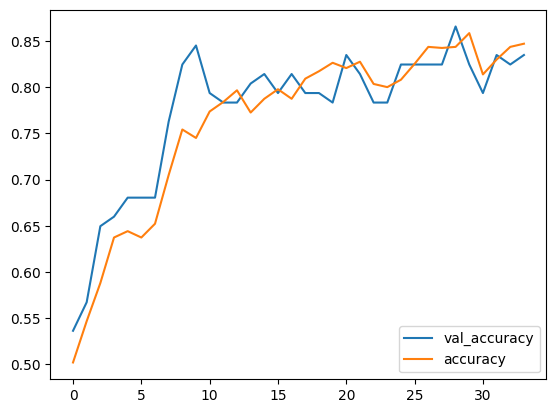

In [131]:
plt.plot(model.history.history["val_accuracy"],label = "val_accuracy")
plt.plot(model.history.history["accuracy"],label = "accuracy")
plt.legend()
plt.show()